In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset
import ignite
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
import string
import math
from torch.autograd import Variable
pd.set_option("display.max_columns", 101)
pd.set_option("display.max_rows", 101)
np.random.seed(123)
torch.manual_seed(123)
#https://www.analyticsvidhya.com/blog/2019/01/guide-pytorch-neural-networks-case-studies/
from sklearn.metrics import accuracy_score
from sklearn import linear_model, metrics, model_selection, ensemble


Using TensorFlow backend.


In [2]:
basic = pd.read_csv('./data/PBP - 2016 - Week 1.csv')
offense_stats = pd.read_csv('./data/Offense Stats 2016.csv')

In [3]:
offense_stats

,Rk,School,G,Pts,Passing Completion,Pass Attemps,completion percentage,passing yards,Passing Touchdowns,Rush Attempts,Rushing yards,rush average,Rush Touchdowns,Total Offense Plays,Total yards,total yards per play,First down by pass,First down by rush,Number of Penalties,Penalty yards
0,1,Western Kentucky,14,45.5,21.8,33.6,64.8,336.8,3.0,34.8,186.4,5.4,2.5,68.4,523.1,7.6,13.1,9.9,6.6,66.7
1,2,Louisiana Tech,14,44.3,25.9,38.8,66.7,363.4,3.1,29.6,151.6,5.1,2.1,68.4,514.9,7.5,15.0,8.5,5.1,48.2
2,3,Oklahoma,13,43.9,20.8,29.5,70.6,318.0,3.3,44.0,236.8,5.4,2.3,73.5,554.8,7.5,13.5,10.5,5.1,52.2
3,4,South Florida,13,43.8,17.3,27.5,62.8,226.2,2.0,43.6,285.8,6.6,3.6,71.2,512.0,7.2,9.3,12.6,6.4,58.7
4,5,Texas Tech,12,43.7,35.7,54.4,65.5,463.0,3.9,32.4,103.6,3.2,1.8,86.8,566.6,6.5,19.8,7.7,7.8,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,124,Texas State,12,18.6,21.4,34.6,61.9,219.9,1.2,35.5,82.4,2.3,1.1,70.1,302.3,4.3,10.8,5.5,6.8,57.3
124,125,Fresno State,12,17.7,17.5,33.8,51.9,213.1,1.1,36.7,116.2,3.2,0.9,70.4,329.3,4.7,8.5,6.9,6.3,55.8
125,126,Buffalo,12,16.5,17.7,33.1,53.4,200.5,0.9,35.5,153.3,4.3,1.0,68.6,353.8,5.2,9.3,8.0,5.3,43.1
126,127,Rutgers,12,15.7,13.3,27.7,47.9,138.3,0.9,40.7,145.3,3.6,0.7,68.3,283.5,4.1,6.8,8.0,5.3,43.0


In [4]:
basic['homeTeam'].unique()

array(['Baylor', 'Iowa State', 'Temple', 'Texas', 'Florida', 'Vanderbilt',
       'Alabama', 'Arkansas', 'Auburn', 'UNC', 'Kentucky', 'Wisconsin',
       'Miss St', 'West Virginia', 'Tennessee', 'Texas A&M', 'FSU', 'Cal',
       'Utah', 'Minnesota', 'Colorado', 'Stanford', 'Arizona State',
       'Oregon', 'Washington', 'Washington St', 'Utah State', 'UNLV',
       'Air Force', 'Louisiana', 'New Mexico', 'Wyoming', 'Nebraska',
       'Michigan', 'Nevada', 'Tulsa', 'Cent Michigan', 'Georgia State',
       'Buffalo', 'OSU', 'Penn State', 'Iowa', 'E Michigan', 'Ohio',
       'Arkansas State', 'Akron', 'Northwestern', 'Louisville', 'FIU',
       'FAU', 'Mid Tennessee', 'North Texas', 'Old Dominion',
       'W Kentucky', 'UTEP', 'UTSA', 'Wake Forest', 'NC State',
       'Syracuse', 'Boston College', 'Duke', 'Pitt', 'UVA', 'VT',
       'Cincinnati', 'UConn', 'UCF', 'ECU', 'USF', 'Houston', 'Memphis',
       'Navy', 'Purdue', 'Kansas', 'Oklahoma State', 'TCU', 'Texas Tech',
       'Michigan S

In [5]:
df = basic.join(offense_stats.set_index('School'), on='homeTeam')

In [6]:
df

,gameId,year,week,homeId,homeTeam,homeAbbr,awayId,awayTeam,awayAbbr,driveIndex,playIndex,offenseId,offenseTeam,offenseAbbr,defenseId,defenseTeam,defenseAbbr,homeScore,awayScore,quarter,clock,wallclock,type,down,distance,yardLine,yardsGained,endYardLine,description,Rk,G,Pts,Passing Completion,Pass Attemps,completion percentage,passing yards,Passing Touchdowns,Rush Attempts,Rushing yards,rush average,Rush Touchdowns,Total Offense Plays,Total yards,total yards per play,First down by pass,First down by rush,Number of Penalties,Penalty yards
0,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,0,0,239,Baylor,BAY,2466,Northwestern St,NWST,0,0,1,15:00,2016-09-03T06:36:41Z,Kickoff,1,10,35,10,86,"Drew Galitz kickoff for 61 yds , Shakeir Ryan ...",35.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4,9.9,82.2
1,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,0,1,2466,Northwestern St,NWST,239,Baylor,BAY,0,0,1,14:55,2016-09-03T06:38:11Z,Timeout,1,10,86,0,86,"Timeout NORTHWESTERN ST, clock 14:55",35.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4,9.9,82.2
2,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,0,2,2466,Northwestern St,NWST,239,Baylor,BAY,0,0,1,14:55,2016-09-03T06:38:11Z,Rush,1,10,86,-1,87,De'Mard Llorens run for a loss of 1 yard to th...,35.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4,9.9,82.2
3,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,0,3,2466,Northwestern St,NWST,239,Baylor,BAY,0,0,1,14:55,2016-09-03T06:38:11Z,Rush,2,11,87,8,79,De'Mard Llorens run for 8 yds to the NWSt 21,35.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4,9.9,82.2
4,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,0,4,2466,Northwestern St,NWST,239,Baylor,BAY,0,0,1,14:55,2016-09-03T06:38:11Z,Rush,3,3,79,0,79,De'Mard Llorens run for no gain to the NWSt 21,35.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4,9.9,82.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16136,400869810,2016,1,2653,Troy,TROY,2046,Austin Peay,PEAY,25,0,2653,Troy,TROY,2046,Austin Peay,PEAY,57,17,4,3:18,2016-09-04T08:15:02Z,Rush,1,10,33,15,48,B.J. Smith run for 15 yds to the Troy 48 for a...,39.0,13.0,33.7,24.2,37.8,64.0,260.5,1.9,37.3,169.2,4.5,2.2,75.2,429.6,5.7,11.8,9.2,6.8,61.8
16137,400869810,2016,1,2653,Troy,TROY,2046,Austin Peay,PEAY,25,1,2653,Troy,TROY,2046,Austin Peay,PEAY,57,17,4,3:18,2016-09-04T08:15:02Z,Rush,1,10,48,3,51,B.J. Smith run for 3 yds to the APeay 49,39.0,13.0,33.7,24.2,37.8,64.0,260.5,1.9,37.3,169.2,4.5,2.2,75.2,429.6,5.7,11.8,9.2,6.8,61.8
16138,400869810,2016,1,2653,Troy,TROY,2046,Austin Peay,PEAY,25,2,2653,Troy,TROY,2046,Austin Peay,PEAY,57,17,4,3:18,2016-09-04T08:15:02Z,Rush,2,7,51,-2,49,B.J. Smith run for a loss of 2 yards to the Tr...,39.0,13.0,33.7,24.2,37.8,64.0,260.5,1.9,37.3,169.2,4.5,2.2,75.2,429.6,5.7,11.8,9.2,6.8,61.8
16139,400869810,2016,1,2653,Troy,TROY,2046,Austin Peay,PEAY,25,3,2653,Troy,TROY,2046,Austin Peay,PEAY,57,17,4,3:18,2016-09-04T08:15:02Z,Rush,3,9,49,8,57,B.J. Smith run for 8 yds to the APeay 43,39.0,13.0,33.7,24.2,37.8,64.0,260.5,1.9,37.3,169.2,4.5,2.2,75.2,429.6,5.7,11.8,9.2,6.8,61.8


In [7]:
df = df.dropna()

In [8]:
df = df.replace('Pass Incompletion', 'Pass')
df = df.replace('Pass Reception', 'Pass')
df = df.replace('Passing Touchdown', 'Pass')
df = df.replace('Rushing Touchdown', 'Rush')
df = df.replace('Sack', 'Pass')

In [9]:
offense = df.query('homeTeam == offenseTeam')
offense = offense[(offense.type == 'Pass') | (offense.type == 'Rush')]

In [10]:
offense

,gameId,year,week,homeId,homeTeam,homeAbbr,awayId,awayTeam,awayAbbr,driveIndex,playIndex,offenseId,offenseTeam,offenseAbbr,defenseId,defenseTeam,defenseAbbr,homeScore,awayScore,quarter,clock,wallclock,type,down,distance,yardLine,yardsGained,endYardLine,description,Rk,G,Pts,Passing Completion,Pass Attemps,completion percentage,passing yards,Passing Touchdowns,Rush Attempts,Rushing yards,rush average,Rush Touchdowns,Total Offense Plays,Total yards,total yards per play,First down by pass,First down by rush,Number of Penalties,Penalty yards
6,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,1,0,239,Baylor,BAY,2466,Northwestern St,NWST,0,0,1,12:45,2016-09-03T06:41:38Z,Pass,1,10,41,6,47,Seth Russell pass complete to KD Cannon for 6 ...,35.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4,9.9,82.2
7,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,1,1,239,Baylor,BAY,2466,Northwestern St,NWST,0,0,1,12:45,2016-09-03T06:41:38Z,Rush,2,4,47,3,50,Shock Linwood run for 3 yds to the 50 yard line,35.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4,9.9,82.2
9,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,1,3,239,Baylor,BAY,2466,Northwestern St,NWST,0,0,1,12:45,2016-09-03T06:41:38Z,Rush,3,11,40,42,82,Shock Linwood run for 42 yds to the NWSt 18 fo...,35.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4,9.9,82.2
10,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,1,4,239,Baylor,BAY,2466,Northwestern St,NWST,0,0,1,12:45,2016-09-03T06:41:38Z,Pass,1,10,82,5,87,Seth Russell pass complete to Quan Jones for 5...,35.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4,9.9,82.2
11,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,1,5,239,Baylor,BAY,2466,Northwestern St,NWST,0,0,1,12:45,2016-09-03T06:41:38Z,Pass,2,5,87,0,87,Seth Russell pass incomplete,35.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4,9.9,82.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16129,400869810,2016,1,2653,Troy,TROY,2046,Austin Peay,PEAY,23,5,2653,Troy,TROY,2046,Austin Peay,PEAY,57,17,4,5:39,2016-09-04T08:08:20Z,Rush,1,10,50,50,100,"Kaleb Barker run for 50 yds for a TD, (Chandle...",39.0,13.0,33.7,24.2,37.8,64.0,260.5,1.9,37.3,169.2,4.5,2.2,75.2,429.6,5.7,11.8,9.2,6.8,61.8
16136,400869810,2016,1,2653,Troy,TROY,2046,Austin Peay,PEAY,25,0,2653,Troy,TROY,2046,Austin Peay,PEAY,57,17,4,3:18,2016-09-04T08:15:02Z,Rush,1,10,33,15,48,B.J. Smith run for 15 yds to the Troy 48 for a...,39.0,13.0,33.7,24.2,37.8,64.0,260.5,1.9,37.3,169.2,4.5,2.2,75.2,429.6,5.7,11.8,9.2,6.8,61.8
16137,400869810,2016,1,2653,Troy,TROY,2046,Austin Peay,PEAY,25,1,2653,Troy,TROY,2046,Austin Peay,PEAY,57,17,4,3:18,2016-09-04T08:15:02Z,Rush,1,10,48,3,51,B.J. Smith run for 3 yds to the APeay 49,39.0,13.0,33.7,24.2,37.8,64.0,260.5,1.9,37.3,169.2,4.5,2.2,75.2,429.6,5.7,11.8,9.2,6.8,61.8
16138,400869810,2016,1,2653,Troy,TROY,2046,Austin Peay,PEAY,25,2,2653,Troy,TROY,2046,Austin Peay,PEAY,57,17,4,3:18,2016-09-04T08:15:02Z,Rush,2,7,51,-2,49,B.J. Smith run for a loss of 2 yards to the Tr...,39.0,13.0,33.7,24.2,37.8,64.0,260.5,1.9,37.3,169.2,4.5,2.2,75.2,429.6,5.7,11.8,9.2,6.8,61.8


In [11]:
def invert_ranking(df):
    """This is so the higher the ranking the better"""
    max_rank = df['Rk'].max()
    for index,row in df.iterrows():
        df.at[index,'Rk'] = max_rank - int(row['Rk'])
    return df

In [12]:
offense = invert_ranking(offense)

In [13]:
offense.columns

Index(['gameId', 'year', 'week', 'homeId', 'homeTeam', 'homeAbbr', 'awayId',
       'awayTeam', 'awayAbbr', 'driveIndex', 'playIndex', 'offenseId',
       'offenseTeam', 'offenseAbbr', 'defenseId', 'defenseTeam', 'defenseAbbr',
       'homeScore', 'awayScore', 'quarter', 'clock', 'wallclock', 'type',
       'down', 'distance', 'yardLine', 'yardsGained', 'endYardLine',
       'description', 'Rk', 'G', 'Pts', 'Passing Completion', 'Pass Attemps',
       'completion percentage', 'passing yards', 'Passing Touchdowns',
       'Rush Attempts', 'Rushing yards', 'rush average', 'Rush Touchdowns',
       'Total Offense Plays', 'Total yards', 'total yards per play',
       'First down by pass', 'First down by rush', 'Number of Penalties',
       'Penalty yards'],
      dtype='object')

In [14]:
result = offense[['yardsGained']]

In [15]:
result

,yardsGained
6,6
7,3
9,42
10,5
11,0
...,...
16129,50
16136,15
16137,3
16138,-2


In [16]:
features = offense[['down', 'distance', 'yardLine', 'Rk', 'G', 'Pts', 'Passing Completion', 'Pass Attemps',
       'completion percentage', 'passing yards', 'Passing Touchdowns',
       'Rush Attempts', 'Rushing yards', 'rush average', 'Rush Touchdowns',
       'Total Offense Plays', 'Total yards', 'total yards per play',
       'First down by pass', 'First down by rush']]

In [17]:
features

,down,distance,yardLine,Rk,G,Pts,Passing Completion,Pass Attemps,completion percentage,passing yards,Passing Touchdowns,Rush Attempts,Rushing yards,rush average,Rush Touchdowns,Total Offense Plays,Total yards,total yards per play,First down by pass,First down by rush
6,1,10,41,91.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4
7,2,4,47,91.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4
9,3,11,40,91.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4
10,1,10,82,91.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4
11,2,5,87,91.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16129,1,10,50,87.0,13.0,33.7,24.2,37.8,64.0,260.5,1.9,37.3,169.2,4.5,2.2,75.2,429.6,5.7,11.8,9.2
16136,1,10,33,87.0,13.0,33.7,24.2,37.8,64.0,260.5,1.9,37.3,169.2,4.5,2.2,75.2,429.6,5.7,11.8,9.2
16137,1,10,48,87.0,13.0,33.7,24.2,37.8,64.0,260.5,1.9,37.3,169.2,4.5,2.2,75.2,429.6,5.7,11.8,9.2
16138,2,7,51,87.0,13.0,33.7,24.2,37.8,64.0,260.5,1.9,37.3,169.2,4.5,2.2,75.2,429.6,5.7,11.8,9.2


In [18]:
features = features.drop(columns=['Total yards', 'Pass Attemps', 'Rush Attempts', 'Rush Touchdowns', 'Passing Touchdowns', 'First down by pass', 'First down by rush'])

In [19]:
from sklearn.linear_model import LinearRegression


In [20]:
reg = LinearRegression(n_jobs=10).fit(features, result)

In [21]:
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [22]:
reg.coef_

array([[-0.18921037,  0.08498919, -0.037218  , -0.00487543, -0.3994456 ,
         0.09946132,  0.74221448, -0.22668189, -0.05893376,  0.01363336,
        -1.54364387, -0.06719273,  3.43065607]])

In [24]:
reg.predict(features[0:10])

array([[6.73967142],
       [5.81721791],
       [6.48345786],
       [5.21373358],
       [4.41348727],
       [4.2242769 ],
       [5.69756753],
       [4.53069965],
       [4.54936805],
       [3.74912173]])

In [25]:
result[0:10]

,yardsGained
6,6
7,3
9,42
10,5
11,0
12,13
19,8
20,16
21,5
22,0


In [26]:
y_pred = reg.predict(features)

In [27]:
math.sqrt(metrics.mean_squared_error(result, y_pred))

9.97113840572711

In [28]:
reg.score(features, result)

0.020655457795982324

In [29]:
ridge = linear_model.RidgeCV().fit(features, result)

In [30]:
math.sqrt(metrics.mean_squared_error(result, ridge.predict(features)))

9.97148510649864

In [31]:
ridge.score(features, result)

0.020587352149961102

In [32]:
ridge.predict(features[0:10])

array([[6.88714081],
       [5.96799731],
       [6.63230618],
       [5.35630868],
       [4.55896921],
       [4.37064988],
       [5.84169448],
       [4.67894292],
       [4.69219765],
       [3.89485817]])

In [33]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(13, 10)
        self.linear2 = torch.nn.Linear(10, 1)

    def forward(self, x):
        out = self.linear(x)
        out = self.linear2(out)
        return out
    
    
inputDim = 20        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.00001
epochs = 1000

model = linearRegression(inputDim, outputDim)

In [41]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [212]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    inputs = Variable(torch.tensor(features.values).float())
    labels = Variable(torch.tensor(result.values).float())

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(728.9297, grad_fn=<MseLossBackward>)
epoch 0, loss 728.9297485351562
tensor(472.5039, grad_fn=<MseLossBackward>)
epoch 1, loss 472.5039367675781
tensor(349.7191, grad_fn=<MseLossBackward>)
epoch 2, loss 349.7191162109375
tensor(296.6204, grad_fn=<MseLossBackward>)
epoch 3, loss 296.62042236328125
tensor(268.7952, grad_fn=<MseLossBackward>)
epoch 4, loss 268.7951965332031
tensor(250.3761, grad_fn=<MseLossBackward>)
epoch 5, loss 250.37612915039062
tensor(235.8205, grad_fn=<MseLossBackward>)
epoch 6, loss 235.82049560546875
tensor(223.3836, grad_fn=<MseLossBackward>)
epoch 7, loss 223.38360595703125
tensor(212.4423, grad_fn=<MseLossBackward>)
epoch 8, loss 212.44232177734375
tensor(202.7119, grad_fn=<MseLossBackward>)
epoch 9, loss 202.7119140625
tensor(194.0137, grad_fn=<MseLossBackward>)
epoch 10, loss 194.013671875
tensor(186.2119, grad_fn=<MseLossBackward>)
epoch 11, loss 186.21185302734375
tensor(179.1947, grad_fn=<MseLossBackward>)
epoch 12, loss 179.19467163085938
tensor(17

epoch 132, loss 101.65966796875
tensor(101.6459, grad_fn=<MseLossBackward>)
epoch 133, loss 101.64586639404297
tensor(101.6323, grad_fn=<MseLossBackward>)
epoch 134, loss 101.63231658935547
tensor(101.6190, grad_fn=<MseLossBackward>)
epoch 135, loss 101.61900329589844
tensor(101.6059, grad_fn=<MseLossBackward>)
epoch 136, loss 101.60592651367188
tensor(101.5931, grad_fn=<MseLossBackward>)
epoch 137, loss 101.59308624267578
tensor(101.5805, grad_fn=<MseLossBackward>)
epoch 138, loss 101.5804672241211
tensor(101.5681, grad_fn=<MseLossBackward>)
epoch 139, loss 101.56806182861328
tensor(101.5559, grad_fn=<MseLossBackward>)
epoch 140, loss 101.55587005615234
tensor(101.5439, grad_fn=<MseLossBackward>)
epoch 141, loss 101.54388427734375
tensor(101.5321, grad_fn=<MseLossBackward>)
epoch 142, loss 101.53208923339844
tensor(101.5205, grad_fn=<MseLossBackward>)
epoch 143, loss 101.52050018310547
tensor(101.5091, grad_fn=<MseLossBackward>)
epoch 144, loss 101.50909423828125
tensor(101.4979, grad

epoch 282, loss 100.78717041015625
tensor(100.7850, grad_fn=<MseLossBackward>)
epoch 283, loss 100.78495788574219
tensor(100.7828, grad_fn=<MseLossBackward>)
epoch 284, loss 100.78277587890625
tensor(100.7806, grad_fn=<MseLossBackward>)
epoch 285, loss 100.78060913085938
tensor(100.7785, grad_fn=<MseLossBackward>)
epoch 286, loss 100.7784652709961
tensor(100.7763, grad_fn=<MseLossBackward>)
epoch 287, loss 100.77633666992188
tensor(100.7742, grad_fn=<MseLossBackward>)
epoch 288, loss 100.77423858642578
tensor(100.7722, grad_fn=<MseLossBackward>)
epoch 289, loss 100.77215576171875
tensor(100.7701, grad_fn=<MseLossBackward>)
epoch 290, loss 100.77008819580078
tensor(100.7681, grad_fn=<MseLossBackward>)
epoch 291, loss 100.76805114746094
tensor(100.7660, grad_fn=<MseLossBackward>)
epoch 292, loss 100.76602935791016
tensor(100.7640, grad_fn=<MseLossBackward>)
epoch 293, loss 100.76403045654297
tensor(100.7620, grad_fn=<MseLossBackward>)
epoch 294, loss 100.76203918457031
tensor(100.7601, g

epoch 438, loss 100.60445404052734
tensor(100.6039, grad_fn=<MseLossBackward>)
epoch 439, loss 100.60388946533203
tensor(100.6033, grad_fn=<MseLossBackward>)
epoch 440, loss 100.60334014892578
tensor(100.6028, grad_fn=<MseLossBackward>)
epoch 441, loss 100.60279083251953
tensor(100.6022, grad_fn=<MseLossBackward>)
epoch 442, loss 100.60224151611328
tensor(100.6017, grad_fn=<MseLossBackward>)
epoch 443, loss 100.60169982910156
tensor(100.6012, grad_fn=<MseLossBackward>)
epoch 444, loss 100.60116577148438
tensor(100.6006, grad_fn=<MseLossBackward>)
epoch 445, loss 100.60063171386719
tensor(100.6001, grad_fn=<MseLossBackward>)
epoch 446, loss 100.60009765625
tensor(100.5996, grad_fn=<MseLossBackward>)
epoch 447, loss 100.59957885742188
tensor(100.5991, grad_fn=<MseLossBackward>)
epoch 448, loss 100.59905242919922
tensor(100.5985, grad_fn=<MseLossBackward>)
epoch 449, loss 100.5985336303711
tensor(100.5980, grad_fn=<MseLossBackward>)
epoch 450, loss 100.5980224609375
tensor(100.5975, grad_

tensor(100.5485, grad_fn=<MseLossBackward>)
epoch 597, loss 100.54851531982422
tensor(100.5483, grad_fn=<MseLossBackward>)
epoch 598, loss 100.54827880859375
tensor(100.5481, grad_fn=<MseLossBackward>)
epoch 599, loss 100.54805755615234
tensor(100.5478, grad_fn=<MseLossBackward>)
epoch 600, loss 100.5478286743164
tensor(100.5476, grad_fn=<MseLossBackward>)
epoch 601, loss 100.54759979248047
tensor(100.5474, grad_fn=<MseLossBackward>)
epoch 602, loss 100.54737854003906
tensor(100.5471, grad_fn=<MseLossBackward>)
epoch 603, loss 100.54714965820312
tensor(100.5469, grad_fn=<MseLossBackward>)
epoch 604, loss 100.54692840576172
tensor(100.5467, grad_fn=<MseLossBackward>)
epoch 605, loss 100.54670715332031
tensor(100.5465, grad_fn=<MseLossBackward>)
epoch 606, loss 100.5464859008789
tensor(100.5463, grad_fn=<MseLossBackward>)
epoch 607, loss 100.5462646484375
tensor(100.5460, grad_fn=<MseLossBackward>)
epoch 608, loss 100.5460433959961
tensor(100.5458, grad_fn=<MseLossBackward>)
epoch 609, l

tensor(100.5200, grad_fn=<MseLossBackward>)
epoch 749, loss 100.52001953125
tensor(100.5199, grad_fn=<MseLossBackward>)
epoch 750, loss 100.51985931396484
tensor(100.5197, grad_fn=<MseLossBackward>)
epoch 751, loss 100.51969909667969
tensor(100.5195, grad_fn=<MseLossBackward>)
epoch 752, loss 100.51953887939453
tensor(100.5194, grad_fn=<MseLossBackward>)
epoch 753, loss 100.51937866210938
tensor(100.5192, grad_fn=<MseLossBackward>)
epoch 754, loss 100.51921844482422
tensor(100.5191, grad_fn=<MseLossBackward>)
epoch 755, loss 100.51905822753906
tensor(100.5189, grad_fn=<MseLossBackward>)
epoch 756, loss 100.5188980102539
tensor(100.5187, grad_fn=<MseLossBackward>)
epoch 757, loss 100.51873779296875
tensor(100.5186, grad_fn=<MseLossBackward>)
epoch 758, loss 100.5185775756836
tensor(100.5184, grad_fn=<MseLossBackward>)
epoch 759, loss 100.51841735839844
tensor(100.5183, grad_fn=<MseLossBackward>)
epoch 760, loss 100.51825714111328
tensor(100.5181, grad_fn=<MseLossBackward>)
epoch 761, lo

tensor(100.4997, grad_fn=<MseLossBackward>)
epoch 884, loss 100.49970245361328
tensor(100.4996, grad_fn=<MseLossBackward>)
epoch 885, loss 100.49955749511719
tensor(100.4994, grad_fn=<MseLossBackward>)
epoch 886, loss 100.4994125366211
tensor(100.4993, grad_fn=<MseLossBackward>)
epoch 887, loss 100.49927520751953
tensor(100.4991, grad_fn=<MseLossBackward>)
epoch 888, loss 100.49913024902344
tensor(100.4990, grad_fn=<MseLossBackward>)
epoch 889, loss 100.49899291992188
tensor(100.4988, grad_fn=<MseLossBackward>)
epoch 890, loss 100.49884796142578
tensor(100.4987, grad_fn=<MseLossBackward>)
epoch 891, loss 100.49870300292969
tensor(100.4986, grad_fn=<MseLossBackward>)
epoch 892, loss 100.49856567382812
tensor(100.4984, grad_fn=<MseLossBackward>)
epoch 893, loss 100.49842071533203
tensor(100.4983, grad_fn=<MseLossBackward>)
epoch 894, loss 100.49828338623047
tensor(100.4981, grad_fn=<MseLossBackward>)
epoch 895, loss 100.49813842773438
tensor(100.4980, grad_fn=<MseLossBackward>)
epoch 896

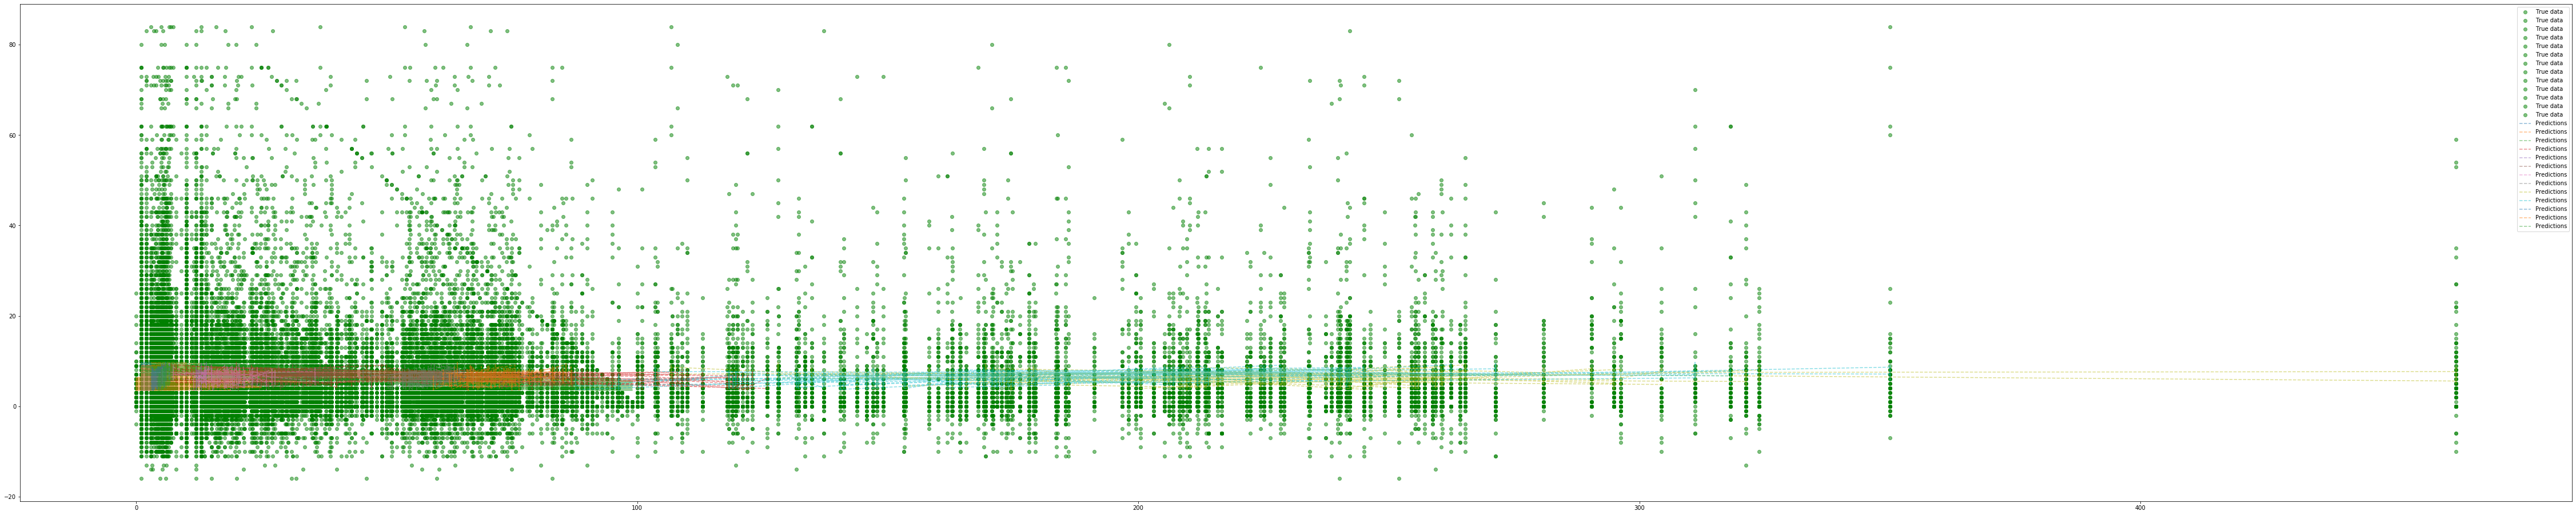

In [213]:
predicted = model(Variable(torch.tensor(features.values).float())).data.numpy()
# print(predicted)
fig, ax = plt.subplots(1,1,figsize=(80,16))
plt.clf()
plt.plot(features, result, 'go', label='True data', alpha=0.5)
plt.plot(features, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [214]:
model(Variable(torch.tensor(features[0:10].values).float()))

tensor([[7.3169],
        [7.2771],
        [7.2786],
        [5.5322],
        [5.4956],
        [5.4749],
        [6.0981],
        [6.0519],
        [5.1745],
        [5.1378]], grad_fn=<AddmmBackward>)

In [215]:
result[0:10]

,yardsGained
6,6
7,3
9,42
10,5
11,0
12,13
19,8
20,16
21,5
22,0


In [216]:
result.describe()

,yardsGained
count,4362.000000
mean,6.358093
std,10.076896
min,-16.000000
25%,0.000000
50%,4.000000
75%,9.000000
max,84.000000


In [223]:
predicted = pd.DataFrame(model(Variable(torch.tensor(features.values).float())).detach().numpy())

In [224]:
predicted.describe()

,0
count,4362.000000
mean,6.356809
std,1.174595
min,3.481674
25%,5.491430
50%,6.389651
75%,7.202314
max,9.702760


##  Making a rushing model

In [35]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(14, 10)
        self.linear2 = torch.nn.Linear(10, 1)

    def forward(self, x):
        out = self.linear(x)
        out = self.linear2(out)
        return out
    
    
inputDim = 20        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.00001
epochs = 100

RushingModel = linearRegression(inputDim, outputDim)

In [36]:
rushing = offense.query('type == "Rush"')

In [37]:
rushing_result = rushing['yardsGained']

In [38]:
rushing_features = rushing[['down', 'distance', 'yardLine', 'Rk', 'G', 'Pts',
                            'Rushing yards', 'rush average', 'Rush Touchdowns',
       'Total Offense Plays', 'Total yards', 'total yards per play',
       'First down by pass', 'First down by rush']]

In [39]:
rushing_features

,down,distance,yardLine,Rk,G,Pts,Rushing yards,rush average,Rush Touchdowns,Total Offense Plays,Total yards,total yards per play,First down by pass,First down by rush
7,2,4,47,91.0,13.0,34.6,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4
9,3,11,40,91.0,13.0,34.6,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4
12,3,5,87,91.0,13.0,34.6,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4
20,2,2,77,91.0,13.0,34.6,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4
21,1,7,93,91.0,13.0,34.6,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16129,1,10,50,87.0,13.0,33.7,169.2,4.5,2.2,75.2,429.6,5.7,11.8,9.2
16136,1,10,33,87.0,13.0,33.7,169.2,4.5,2.2,75.2,429.6,5.7,11.8,9.2
16137,1,10,48,87.0,13.0,33.7,169.2,4.5,2.2,75.2,429.6,5.7,11.8,9.2
16138,2,7,51,87.0,13.0,33.7,169.2,4.5,2.2,75.2,429.6,5.7,11.8,9.2


In [42]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    inputs = Variable(torch.tensor(rushing_features.values).float())
    labels = Variable(torch.tensor(rushing_result.values).float())

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = RushingModel(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

/usr/local/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([2413])) that is different to the input size (torch.Size([2413, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(243.6237, grad_fn=<MseLossBackward>)
epoch 0, loss 243.6237335205078
tensor(243.6237, grad_fn=<MseLossBackward>)
epoch 1, loss 243.6237335205078
tensor(243.6237, grad_fn=<MseLossBackward>)
epoch 2, loss 243.6237335205078
tensor(243.6237, grad_fn=<MseLossBackward>)
epoch 3, loss 243.6237335205078
tensor(243.6237, grad_fn=<MseLossBackward>)
epoch 4, loss 243.6237335205078
tensor(243.6237, grad_fn=<MseLossBackward>)
epoch 5, loss 243.6237335205078
tensor(243.6237, grad_fn=<MseLossBackward>)
epoch 6, loss 243.6237335205078
tensor(243.6237, grad_fn=<MseLossBackward>)
epoch 7, loss 243.6237335205078
tensor(243.6237, grad_fn=<MseLossBackward>)
epoch 8, loss 243.6237335205078
tensor(243.6237, grad_fn=<MseLossBackward>)
epoch 9, loss 243.6237335205078
tensor(243.6237, grad_fn=<MseLossBackward>)
epoch 10, loss 243.6237335205078
tensor(243.6237, grad_fn=<MseLossBackward>)
epoch 11, loss 243.6237335205078
tensor(243.6237, grad_fn=<MseLossBackward>)
epoch 12, loss 243.6237335205078
tensor(24

In [43]:
predicted_rush = pd.DataFrame(RushingModel(Variable(torch.tensor(rushing_features.values).float())).detach().numpy())

In [44]:
predicted_rush.describe()

,0
count,2413.000000
mean,18.295858
std,2.858047
min,11.581381
25%,16.239925
50%,18.217661
75%,20.187279
max,27.209621


In [45]:
rushing_result.describe()

count    2413.000000
mean        5.562370
std         8.564308
min       -16.000000
25%         1.000000
50%         4.000000
75%         7.000000
max        84.000000
Name: yardsGained, dtype: float64

In [46]:
rush_reg = LinearRegression().fit(rushing_features, rushing_result)

In [47]:
y_pred = rush_reg.predict(rushing_features)


math.sqrt(metrics.mean_squared_error(rushing_result, y_pred))

8.410821116054334

In [48]:
pd.DataFrame(y_pred).describe()

,0
count,2413.000000
mean,5.562370
std,1.605033
min,0.924522
25%,4.442649
50%,5.539771
75%,6.559750
max,12.361089


In [49]:
rushing_result.head()

7      3
9     42
12    13
20    16
21     5
Name: yardsGained, dtype: int64

## Passing Model

In [50]:
passing = offense.query('type == "Pass"')

In [51]:
passing_result = passing['yardsGained']

In [52]:
passing_features = passing[['down', 'distance', 'yardLine', 'Rk', 'G', 'Pts', 'Passing Completion', 'Pass Attemps',
       'completion percentage', 'passing yards', 'Passing Touchdowns',
       'Total Offense Plays', 'Total yards', 'total yards per play',
       'First down by pass', 'First down by rush']]

In [53]:
pass_reg = LinearRegression().fit(passing_features, passing_result)

In [54]:
pass_pred = pass_reg.predict(passing_features)


math.sqrt(metrics.mean_squared_error(passing_result, pass_pred))

11.417283943612857

In [55]:
passing_result.describe()

count    1949.000000
mean        7.343253
std        11.608327
min       -14.000000
25%         0.000000
50%         4.000000
75%        11.000000
max        83.000000
Name: yardsGained, dtype: float64

In [56]:
pd.DataFrame(pass_pred).describe()

,0
count,1949.000000
mean,7.343253
std,2.081340
min,1.418995
25%,5.983598
50%,7.313850
75%,8.570626
max,18.663397


In [57]:
def rush_feature_label_split(df):
    rushing = df.query('type == "Rush"')
    rushing_result = rushing['yardsGained']
    rushing_features = rushing[['down', 'distance', 'yardLine', 'Rk', 'G', 'Pts',
                            'Rushing yards', 'rush average', 'Rush Touchdowns',
       'Total Offense Plays', 'Total yards', 'total yards per play',
       'First down by pass', 'First down by rush']]
    return rushing_features, rushing_result

In [58]:
def pass_feature_label_split(df):
    passing = df.query('type == "Pass"')
    passing_result = passing['yardsGained']
    passing_features = passing[['down', 'distance', 'yardLine', 'Rk', 'G', 'Pts', 'Passing Completion', 'Pass Attemps',
       'completion percentage', 'passing yards', 'Passing Touchdowns',
       'Total Offense Plays', 'Total yards', 'total yards per play',
       'First down by pass', 'First down by rush']]
    return passing_features, passing_result

## Testing the models with week 2 data

In [59]:
week2 = pd.read_csv('./data/PBP - 2016 - Week 2.csv')

In [60]:
week2 = week2.join(offense_stats.set_index('School'), on='homeTeam')

In [61]:
week2 = week2.replace('Pass Incompletion', 'Pass')
week2 = week2.replace('Pass Reception', 'Pass')
week2 = week2.replace('Passing Touchdown', 'Pass')
week2 = week2.replace('Rushing Touchdown', 'Rush')
week2 = week2.replace('Sack', 'Pass')
week2 = week2.query('homeTeam == offenseTeam')
week2 = week2[(week2.type == 'Pass') | (week2.type == 'Rush')]

In [62]:
week2 = week2.dropna()

In [63]:
week2

,gameId,year,week,homeId,homeTeam,homeAbbr,awayId,awayTeam,awayAbbr,driveIndex,playIndex,offenseId,offenseTeam,offenseAbbr,defenseId,defenseTeam,defenseAbbr,homeScore,awayScore,quarter,clock,wallclock,type,down,distance,yardLine,yardsGained,endYardLine,description,Rk,G,Pts,Passing Completion,Pass Attemps,completion percentage,passing yards,Passing Touchdowns,Rush Attempts,Rushing yards,rush average,Rush Touchdowns,Total Offense Plays,Total yards,total yards per play,First down by pass,First down by rush,Number of Penalties,Penalty yards
6,400868877,2016,2,239,Baylor,BAY,2567,SMU,SMU,1,0,239,Baylor,BAY,2567,SMU,SMU,0,0,1,14:02,2016-09-11T02:43:41Z,Pass,1,10,21,0,21,Seth Russell pass incomplete,35.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4,9.9,82.2
7,400868877,2016,2,239,Baylor,BAY,2567,SMU,SMU,1,1,239,Baylor,BAY,2567,SMU,SMU,0,0,1,14:02,2016-09-11T02:43:41Z,Pass,2,10,21,8,29,Seth Russell pass complete to Chris Platt for ...,35.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4,9.9,82.2
8,400868877,2016,2,239,Baylor,BAY,2567,SMU,SMU,1,2,239,Baylor,BAY,2567,SMU,SMU,0,0,1,14:02,2016-09-11T02:43:41Z,Rush,3,2,29,8,37,Seth Russell run for 8 yds to the Bayl 37 for ...,35.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4,9.9,82.2
9,400868877,2016,2,239,Baylor,BAY,2567,SMU,SMU,1,3,239,Baylor,BAY,2567,SMU,SMU,0,0,1,14:02,2016-09-11T02:43:41Z,Rush,1,10,37,-4,33,Lynx Hawthorne run for a loss of 4 yards to th...,35.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4,9.9,82.2
10,400868877,2016,2,239,Baylor,BAY,2567,SMU,SMU,1,4,239,Baylor,BAY,2567,SMU,SMU,0,0,1,14:02,2016-09-11T02:43:41Z,Rush,2,14,33,0,33,Shock Linwood run for no gain to the Bayl 33,35.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4,9.9,82.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13516,400869812,2016,2,309,Louisiana,ULL,2377,McNeese,MCNS,18,14,309,Louisiana,ULL,2377,McNeese,MCNS,27,15,4,10:37,2016-09-11T09:38:27Z,Rush,3,1,99,0,99,Elijah McGuire run for no gain to the McNSt 1,109.0,13.0,23.6,15.7,26.4,59.5,178.2,0.9,44.9,179.4,4.0,1.6,71.3,357.6,5.0,7.6,10.3,7.2,58.2
13526,400869812,2016,2,309,Louisiana,ULL,2377,McNeese,MCNS,20,0,309,Louisiana,ULL,2377,McNeese,MCNS,30,15,4,3:13,2016-09-11T09:57:59Z,Pass,1,10,42,0,42,Anthony Jennings pass incomplete to Gary Haynes,109.0,13.0,23.6,15.7,26.4,59.5,178.2,0.9,44.9,179.4,4.0,1.6,71.3,357.6,5.0,7.6,10.3,7.2,58.2
13527,400869812,2016,2,309,Louisiana,ULL,2377,McNeese,MCNS,20,1,309,Louisiana,ULL,2377,McNeese,MCNS,30,15,4,3:13,2016-09-11T09:57:59Z,Rush,2,10,42,3,45,Jordan Wright run for 3 yds to the LaLaf 45,109.0,13.0,23.6,15.7,26.4,59.5,178.2,0.9,44.9,179.4,4.0,1.6,71.3,357.6,5.0,7.6,10.3,7.2,58.2
13528,400869812,2016,2,309,Louisiana,ULL,2377,McNeese,MCNS,20,2,309,Louisiana,ULL,2377,McNeese,MCNS,30,15,4,3:13,2016-09-11T09:57:59Z,Pass,3,7,45,0,45,Anthony Jennings pass incomplete to Ja'Marcus ...,109.0,13.0,23.6,15.7,26.4,59.5,178.2,0.9,44.9,179.4,4.0,1.6,71.3,357.6,5.0,7.6,10.3,7.2,58.2


In [64]:
week2_rush_feat, week2_rush_label = rush_feature_label_split(week2)
week2_pass_feat, week2_pass_label = pass_feature_label_split(week2)

In [65]:
week2_rush_pred=rush_reg.predict(week2_rush_feat)


math.sqrt(metrics.mean_squared_error(week2_rush_label, week2_rush_pred))

8.792941638536647

In [66]:
week2_pass_pred=pass_reg.predict(week2_pass_feat)


math.sqrt(metrics.mean_squared_error(week2_pass_label, week2_pass_pred))

12.78294961988225

In [67]:
pd.DataFrame(week2_pass_pred).describe()

,0
count,1761.000000
mean,7.310648
std,3.560623
min,-2.369709
25%,4.728040
50%,7.032795
75%,9.905089
max,19.267656


In [68]:
pd.DataFrame(week2_pass_label).describe()

,yardsGained
count,1761.000000
mean,7.478137
std,12.306535
min,-24.000000
25%,0.000000
50%,4.000000
75%,11.000000
max,89.000000


In [70]:
import pickle
filename = 'models/rush_reg.sav'
pickle.dump(rush_reg, open(filename, 'wb'))
pickle.dump(pass_reg, open('models/pass_reg.sav', 'wb'))